In [41]:
# NOTE: has to be done in python 2.7 as python 3 currently not supported by the fitparse package
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import fitparse
import gmplot # for plotting on Google maps
from scipy.signal import savgol_filter

plt.style.use('default')
%matplotlib inline

# Using pandas

We can see below that the .csv files available for download from Garmin Connect barely contain any information. They (at least for this running dataset) are split into 1km splits.

As such, we use the fitparse module that has been developed to handle the .FIT files available from Garmin Connect. The issue here is that this package is new and thus a lot of functionality is missing or not perfected.

In [42]:
data = pd.read_csv('Gary_run_030218.csv', index_col=0)
data

,Time,Moving Time,Distance,Elevation Gain,Elev Loss,Avg Pace,Avg Moving Paces,Best Pace,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg HR,Max HR,Avg Temperature,Calories
Split,,,,,,,,,,,,,,,
1,00:04:23.872,00:04:20.00,1.00,2,27,0:04:23,0:04:20,0:03:52,185.875000,204.0,122.700000,144.0,157.0,--,63
2,00:05:05.188,00:05:02.00,1.00,41,4,0:05:05,0:05:02,0:04:22,176.859375,183.0,111.859998,156.0,167.0,--,69
3,00:04:51.892,00:04:50.00,1.00,13,22,0:04:51,0:04:50,0:03:58,183.671875,206.0,112.109998,160.0,168.0,--,77
4,00:04:46.792,00:04:43.00,1.00,28,18,0:04:46,0:04:43,0:03:19,182.343750,205.0,115.340002,165.0,179.0,--,77
5,00:04:54.454,00:04:54.00,1.00,5,16,0:04:54,0:04:54,0:03:58,178.640625,197.0,114.940002,157.0,164.0,--,74
6,00:05:18.656,00:05:16.00,1.00,10,10,0:05:18,0:05:16,0:04:09,177.906250,242.0,106.609998,154.0,170.0,--,73
7,00:04:14.487,00:04:10.00,1.00,10,16,0:04:14,0:04:10,0:03:47,187.390625,206.0,126.900000,168.0,173.0,--,69
8,00:04:16.327,00:04:14.00,1.00,8,9,0:04:16,0:04:14,0:03:50,185.437500,196.0,126.419995,171.0,175.0,--,72
9,00:04:12.939,00:04:12.00,1.00,8,16,0:04:12,0:04:12,0:03:52,187.359375,206.0,127.059998,171.0,174.0,--,71


# Using fitparse

In [43]:
fitfile = fitparse.FitFile('Gary_run_030218.fit')
print(type(fitfile))

<class 'fitparse.base.FitFile'>


In [44]:
fitfile.messages[:15]

[<DataMessage: file_id (#0) -- local mesg: #0, fields: [serial_number: 3949767153, time_created: 2018-02-03 08:40:19, unknown_7: None, manufacturer: garmin, garmin_product: fr920xt, number: None, type: activity]>,
 <DataMessage: file_creator (#49) -- local mesg: #1, fields: [software_version: 950, hardware_version: None]>,
 <DataMessage: event (#21) -- local mesg: #2, fields: [timestamp: 2018-02-03 08:40:19, timer_trigger: manual, event: timer, event_type: start, event_group: 0]>,
 <DataMessage: device_info (#23) -- local mesg: #3, fields: [timestamp: 2018-02-03 08:40:19, serial_number: 3949767153, cum_operating_time: None, unknown_8: None, unknown_15: None, unknown_16: None, manufacturer: garmin, garmin_product: fr920xt, software_version: 9.5, battery_voltage: None, ant_device_number: None, device_index: creator, device_type: None, hardware_version: None, unknown_9: None, battery_status: None, ant_transmission_type: None, ant_network: None, unknown_23: None, source_type: local]>,
 <Da

This is pretty difficult to interpret! But can use the get_messages() method to pick out all of the 'record' messages, for example.

It looks like the 'record' messages are the time samples containing the useful measurements

The print code in the cell below is taken from the fitparse documentation example:

In [45]:
get_records = list(fitfile.get_messages('record'))  # list(Generator object)
print 'Number of records in file:', len(get_records)

# Get all data messages that are of type record
for record in fitfile.get_messages('record'):

    # Go through all the data entries in this record
    for record_data in record:

        # Print the records name and value (and units if it has any)
        if record_data.units:
            print " * %s: %s %s" % (
                record_data.name, record_data.value, record_data.units,
            )
        else:
            print " * %s: %s" % (record_data.name, record_data.value)
    print

Number of records in file: 699
 * activity_type: running
 * altitude: 169.0 m
 * cadence: 89 rpm
 * distance: 0.0 m
 * enhanced_altitude: 169.0 m
 * enhanced_speed: 2.706 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 86 bpm
 * position_lat: 640064232 semicircles
 * position_long: -21520330 semicircles
 * speed: 2.706 m/s
 * stance_time: 225.0 ms
 * stance_time_balance: 49.78 percent
 * stance_time_percent: 33.25 percent
 * step_length: 605.0 mm
 * timestamp: 2018-02-03 08:40:19
 * vertical_oscillation: 88.7 mm
 * vertical_ratio: 14.15 percent
 * unknown_61: 3624
 * unknown_66: 47

 * activity_type: running
 * altitude: 169.0 m
 * cadence: 90 rpm
 * distance: 0.0 m
 * enhanced_altitude: 169.0 m
 * enhanced_speed: 1.847 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 87 bpm
 * position_lat: 640064294 semicircles
 * position_long: -21520980 semicircles
 * speed: 1.847 m/s
 * stance_time: 222.0 ms
 * stance_time_balance: 49.87 percent
 * stance_time_percent: 33.0 percent
 * step_leng

 * vertical_ratio: 6.9 percent
 * unknown_61: 3495
 * unknown_66: 46

 * activity_type: running
 * altitude: 143.0 m
 * cadence: 93 rpm
 * distance: 824.83 m
 * enhanced_altitude: 143.0 m
 * enhanced_speed: 4.199 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 152 bpm
 * position_lat: 639998033 semicircles
 * position_long: -21586924 semicircles
 * speed: 4.199 m/s
 * stance_time: 207.0 ms
 * stance_time_balance: 50.53 percent
 * stance_time_percent: 32.0 percent
 * step_length: 1242.0 mm
 * timestamp: 2018-02-03 08:43:56
 * vertical_oscillation: 85.7 mm
 * vertical_ratio: 6.53 percent
 * unknown_61: 3494
 * unknown_66: 46

 * activity_type: running
 * altitude: 142.8 m
 * cadence: 93 rpm
 * distance: 845.36 m
 * enhanced_altitude: 142.8 m
 * enhanced_speed: 4.161 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 154 bpm
 * position_lat: 639995912 semicircles
 * position_long: -21587901 semicircles
 * speed: 4.161 m/s
 * stance_time: 207.0 ms
 * stance_time_balance: 50.71 percent
 * 

 * stance_time_balance: 50.43 percent
 * stance_time_percent: 35.0 percent
 * step_length: 934.0 mm
 * timestamp: 2018-02-03 08:47:31
 * vertical_oscillation: 86.7 mm
 * vertical_ratio: 9.15 percent
 * unknown_61: 3681
 * unknown_66: 46

 * activity_type: running
 * altitude: 181.6 m
 * cadence: 86 rpm
 * distance: 1541.28 m
 * enhanced_altitude: 181.6 m
 * enhanced_speed: 2.846 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 166 bpm
 * position_lat: 640035587 semicircles
 * position_long: -21621800 semicircles
 * speed: 2.846 m/s
 * stance_time: 235.0 ms
 * stance_time_balance: 50.25 percent
 * stance_time_percent: 33.75 percent
 * step_length: 980.0 mm
 * timestamp: 2018-02-03 08:47:38
 * vertical_oscillation: 93.7 mm
 * vertical_ratio: 8.87 percent
 * unknown_61: 3686
 * unknown_66: 45

 * activity_type: running
 * altitude: 181.4 m
 * cadence: 87 rpm
 * distance: 1548.43 m
 * enhanced_altitude: 181.4 m
 * enhanced_speed: 2.865 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 167

 * fractional_cadence: 0.0 rpm
 * heart_rate: 161 bpm
 * position_lat: 640089912 semicircles
 * position_long: -21602382 semicircles
 * speed: 3.415 m/s
 * stance_time: 227.0 ms
 * stance_time_balance: 50.31 percent
 * stance_time_percent: 33.75 percent
 * step_length: 1127.0 mm
 * timestamp: 2018-02-03 08:50:55
 * vertical_oscillation: 87.7 mm
 * vertical_ratio: 7.5 percent
 * unknown_61: 3740
 * unknown_66: 46

 * activity_type: running
 * altitude: 192.8 m
 * cadence: 86 rpm
 * distance: 2240.04 m
 * enhanced_altitude: 192.8 m
 * enhanced_speed: 3.406 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 162 bpm
 * position_lat: 640090959 semicircles
 * position_long: -21603683 semicircles
 * speed: 3.406 m/s
 * stance_time: 230.0 ms
 * stance_time_balance: 50.43 percent
 * stance_time_percent: 33.5 percent
 * step_length: 1168.0 mm
 * timestamp: 2018-02-03 08:50:59
 * vertical_oscillation: 92.7 mm
 * vertical_ratio: 7.59 percent
 * unknown_61: 3743
 * unknown_66: 46

 * activity_type: 

 * step_length: 941.0 mm
 * timestamp: 2018-02-03 08:54:40
 * vertical_oscillation: 85.7 mm
 * vertical_ratio: 8.78 percent
 * unknown_61: 3633
 * unknown_66: 46

 * activity_type: running
 * altitude: 169.6 m
 * cadence: 91 rpm
 * distance: 3024.07 m
 * enhanced_altitude: 169.6 m
 * enhanced_speed: 2.809 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 158 bpm
 * position_lat: 640149472 semicircles
 * position_long: -21569678 semicircles
 * speed: 2.809 m/s
 * stance_time: 207.0 ms
 * stance_time_balance: 49.87 percent
 * stance_time_percent: 31.5 percent
 * step_length: 949.0 mm
 * timestamp: 2018-02-03 08:54:47
 * vertical_oscillation: 87.7 mm
 * vertical_ratio: 9.06 percent
 * unknown_61: 3627
 * unknown_66: 46

 * activity_type: running
 * altitude: 168.8 m
 * cadence: 90 rpm
 * distance: 3046.55 m
 * enhanced_altitude: 168.8 m
 * enhanced_speed: 2.958 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 159 bpm
 * position_lat: 640147642 semicircles
 * position_long: -21567042 semi

 * unknown_61: 3740
 * unknown_66: 46

 * activity_type: running
 * altitude: 192.0 m
 * cadence: 90 rpm
 * distance: 3673.46 m
 * enhanced_altitude: 192.0 m
 * enhanced_speed: 4.171 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 163 bpm
 * position_lat: 640097996 semicircles
 * position_long: -21592218 semicircles
 * speed: 4.171 m/s
 * stance_time: 221.0 ms
 * stance_time_balance: 50.43 percent
 * stance_time_percent: 33.0 percent
 * step_length: 1219.0 mm
 * timestamp: 2018-02-03 08:57:55
 * vertical_oscillation: 87.7 mm
 * vertical_ratio: 7.31 percent
 * unknown_61: 3739
 * unknown_66: 46

 * activity_type: running
 * altitude: 191.0 m
 * cadence: 90 rpm
 * distance: 3695.82 m
 * enhanced_altitude: 191.0 m
 * enhanced_speed: 3.975 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 163 bpm
 * position_lat: 640097376 semicircles
 * position_long: -21588321 semicircles
 * speed: 3.975 m/s
 * stance_time: 214.0 ms
 * stance_time_balance: 50.53 percent
 * stance_time_percent: 32.0 per

 * altitude: 166.8 m
 * cadence: 89 rpm
 * distance: 4485.79 m
 * enhanced_altitude: 166.8 m
 * enhanced_speed: 3.07 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 159 bpm
 * position_lat: 640119130 semicircles
 * position_long: -21498082 semicircles
 * speed: 3.07 m/s
 * stance_time: 228.0 ms
 * stance_time_balance: 49.93 percent
 * stance_time_percent: 33.75 percent
 * step_length: 1030.0 mm
 * timestamp: 2018-02-03 09:01:45
 * vertical_oscillation: 85.7 mm
 * vertical_ratio: 8.18 percent
 * unknown_61: 3613
 * unknown_66: 46

 * activity_type: running
 * altitude: 167.2 m
 * cadence: 89 rpm
 * distance: 4495.07 m
 * enhanced_altitude: 167.2 m
 * enhanced_speed: 3.042 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 159 bpm
 * position_lat: 640118133 semicircles
 * position_long: -21497974 semicircles
 * speed: 3.042 m/s
 * stance_time: 226.0 ms
 * stance_time_balance: 50.4 percent
 * stance_time_percent: 33.5 percent
 * step_length: 1060.0 mm
 * timestamp: 2018-02-03 09:01:48
 *

 * enhanced_speed: 2.323 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 139 bpm
 * position_lat: 640057172 semicircles
 * position_long: -21469880 semicircles
 * speed: 2.323 m/s
 * stance_time: 250.0 ms
 * stance_time_balance: 51.03 percent
 * stance_time_percent: 35.25 percent
 * step_length: 853.0 mm
 * timestamp: 2018-02-03 09:06:01
 * vertical_oscillation: 88.7 mm
 * vertical_ratio: 10.25 percent
 * unknown_61: 3582
 * unknown_66: 46

 * activity_type: running
 * altitude: 160.0 m
 * cadence: 87 rpm
 * distance: 5140.38 m
 * enhanced_altitude: 160.0 m
 * enhanced_speed: 2.426 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 140 bpm
 * position_lat: 640055077 semicircles
 * position_long: -21468943 semicircles
 * speed: 2.426 m/s
 * stance_time: 245.0 ms
 * stance_time_balance: 51.59 percent
 * stance_time_percent: 35.5 percent
 * step_length: 888.0 mm
 * timestamp: 2018-02-03 09:06:08
 * vertical_oscillation: 89.7 mm
 * vertical_ratio: 9.93 percent
 * unknown_61: 3579
 * unkno

 * stance_time_percent: 31.5 percent
 * step_length: 1202.0 mm
 * timestamp: 2018-02-03 09:09:46
 * vertical_oscillation: 84.7 mm
 * vertical_ratio: 7.03 percent
 * unknown_61: 3599
 * unknown_66: 46

 * activity_type: running
 * altitude: 164.0 m
 * cadence: 94 rpm
 * distance: 5885.64 m
 * enhanced_altitude: 164.0 m
 * enhanced_speed: 3.863 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 166 bpm
 * position_lat: 640045859 semicircles
 * position_long: -21448467 semicircles
 * speed: 3.863 m/s
 * stance_time: 201.0 ms
 * stance_time_balance: 50.37 percent
 * stance_time_percent: 31.5 percent
 * step_length: 1229.0 mm
 * timestamp: 2018-02-03 09:09:52
 * vertical_oscillation: 84.7 mm
 * vertical_ratio: 6.81 percent
 * unknown_61: 3599
 * unknown_66: 46

 * activity_type: running
 * altitude: 164.0 m
 * cadence: 93 rpm
 * distance: 5905.85 m
 * enhanced_altitude: 164.0 m
 * enhanced_speed: 3.872 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 168 bpm
 * position_lat: 640045962 semic

 * vertical_oscillation: 88.7 mm
 * vertical_ratio: 6.9 percent
 * unknown_61: 3532
 * unknown_66: 46

 * activity_type: running
 * altitude: 151.0 m
 * cadence: 90 rpm
 * distance: 6647.63 m
 * enhanced_altitude: 151.0 m
 * enhanced_speed: 3.947 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 170 bpm
 * position_lat: 640049322 semicircles
 * position_long: -21397338 semicircles
 * speed: 3.947 m/s
 * stance_time: 212.0 ms
 * stance_time_balance: 50.56 percent
 * stance_time_percent: 32.25 percent
 * step_length: 1231.0 mm
 * timestamp: 2018-02-03 09:13:06
 * vertical_oscillation: 88.7 mm
 * vertical_ratio: 6.9 percent
 * unknown_61: 3534
 * unknown_66: 46

 * activity_type: running
 * altitude: 151.8 m
 * cadence: 90 rpm
 * distance: 6668.0 m
 * enhanced_altitude: 151.8 m
 * enhanced_speed: 3.882 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 171 bpm
 * position_lat: 640048636 semicircles
 * position_long: -21400828 semicircles
 * speed: 3.882 m/s
 * stance_time: 217.0 ms
 * stan

 * unknown_61: 3595
 * unknown_66: 46

 * activity_type: running
 * altitude: 163.8 m
 * cadence: 92 rpm
 * distance: 7443.05 m
 * enhanced_altitude: 163.8 m
 * enhanced_speed: 3.882 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 169 bpm
 * position_lat: 640063284 semicircles
 * position_long: -21469298 semicircles
 * speed: 3.882 m/s
 * stance_time: 217.0 ms
 * stance_time_balance: 50.37 percent
 * stance_time_percent: 33.25 percent
 * step_length: 1285.0 mm
 * timestamp: 2018-02-03 09:16:36
 * vertical_oscillation: 83.7 mm
 * vertical_ratio: 6.34 percent
 * unknown_61: 3598
 * unknown_66: 46

 * activity_type: running
 * altitude: 164.4 m
 * cadence: 92 rpm
 * distance: 7456.49 m
 * enhanced_altitude: 164.4 m
 * enhanced_speed: 3.863 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 169 bpm
 * position_lat: 640064637 semicircles
 * position_long: -21468491 semicircles
 * speed: 3.863 m/s
 * stance_time: 210.0 ms
 * stance_time_balance: 50.37 percent
 * stance_time_percent: 32.5 pe

 * activity_type: running
 * altitude: 162.2 m
 * cadence: 96 rpm
 * distance: 8207.41 m
 * enhanced_altitude: 162.2 m
 * enhanced_speed: 3.91 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 171 bpm
 * position_lat: 640034279 semicircles
 * position_long: -21430635 semicircles
 * speed: 3.91 m/s
 * stance_time: 217.0 ms
 * stance_time_balance: 51.12 percent
 * stance_time_percent: 34.75 percent
 * step_length: 1276.0 mm
 * timestamp: 2018-02-03 09:19:48
 * vertical_oscillation: 78.0 mm
 * vertical_ratio: 5.93 percent
 * unknown_61: 3590
 * unknown_66: 46

 * activity_type: running
 * altitude: 161.2 m
 * cadence: 96 rpm
 * distance: 8227.88 m
 * enhanced_altitude: 161.2 m
 * enhanced_speed: 3.956 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 170 bpm
 * position_lat: 640034484 semicircles
 * position_long: -21426962 semicircles
 * speed: 3.956 m/s
 * stance_time: 224.0 ms
 * stance_time_balance: 51.0 percent
 * stance_time_percent: 36.0 percent
 * step_length: 1289.0 mm
 * timesta

 * enhanced_altitude: 158.6 m
 * enhanced_speed: 3.816 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 171 bpm
 * position_lat: 640053183 semicircles
 * position_long: -21422600 semicircles
 * speed: 3.816 m/s
 * stance_time: 210.0 ms
 * stance_time_balance: 50.87 percent
 * stance_time_percent: 31.75 percent
 * step_length: 1282.0 mm
 * timestamp: 2018-02-03 09:23:15
 * vertical_oscillation: 86.7 mm
 * vertical_ratio: 6.62 percent
 * unknown_61: 3572
 * unknown_66: 46

 * activity_type: running
 * altitude: 158.6 m
 * cadence: 90 rpm
 * distance: 9032.4 m
 * enhanced_altitude: 158.6 m
 * enhanced_speed: 3.816 m/s
 * fractional_cadence: 0.5 rpm
 * heart_rate: 174 bpm
 * position_lat: 640053465 semicircles
 * position_long: -21421475 semicircles
 * speed: 3.816 m/s
 * stance_time: 210.0 ms
 * stance_time_balance: 50.78 percent
 * stance_time_percent: 32.0 percent
 * step_length: 1276.0 mm
 * timestamp: 2018-02-03 09:23:17
 * vertical_oscillation: 87.7 mm
 * vertical_ratio: 6.71 percen

 * speed: 6.606 m/s
 * stance_time: 164.0 ms
 * stance_time_balance: 52.03 percent
 * stance_time_percent: 30.0 percent
 * step_length: 1645.0 mm
 * timestamp: 2018-02-03 09:26:47
 * vertical_oscillation: 56.5 mm
 * vertical_ratio: 3.68 percent
 * unknown_61: 3606
 * unknown_66: 46

 * activity_type: running
 * altitude: 164.2 m
 * cadence: 117 rpm
 * distance: 9844.3 m
 * enhanced_altitude: 164.2 m
 * enhanced_speed: 6.587 m/s
 * fractional_cadence: 0.0 rpm
 * heart_rate: 177 bpm
 * position_lat: 640066445 semicircles
 * position_long: -21474005 semicircles
 * speed: 6.587 m/s
 * stance_time: 145.0 ms
 * stance_time_balance: 52.31 percent
 * stance_time_percent: 28.0 percent
 * step_length: 1639.0 mm
 * timestamp: 2018-02-03 09:26:50
 * vertical_oscillation: 54.5 mm
 * vertical_ratio: 3.21 percent
 * unknown_61: 3600
 * unknown_66: 46

 * activity_type: running
 * altitude: 164.2 m
 * cadence: 110 rpm
 * distance: 9865.19 m
 * enhanced_altitude: 164.2 m
 * enhanced_speed: 6.998 m/s
 *

Note from the 'timestamp' of each record that the samples look like they are stored every 1 second. But the number of records is 699, and we know that the run was ~ 49m28s, thus we expect (49 x 60) + 28 = 2908 records, so something fishy is going on...

We'll extract the timestamps and see what they are. First, we'll put the data into a pandas DataFrame:

## Load into Pandas DataFrame

In [46]:
record_df_list = [pd.concat([pd.DataFrame([record_data.value], columns=[record_data.name]) for record_data in record], axis=1) \
    for record in fitfile.get_messages('record')]
df = pd.concat(record_df_list, ignore_index=True)
print df.head(2)
print df.info()

  activity_type  altitude  cadence  distance  enhanced_altitude  \
0       running     169.0       89       0.0              169.0   
1       running     169.0       90       0.0              169.0   

   enhanced_speed  fractional_cadence  heart_rate  position_lat  \
0           2.706                 0.5          86     640064232   
1           1.847                 0.0          87     640064294   

   position_long  speed  stance_time  stance_time_balance  \
0      -21520330  2.706        225.0                49.78   
1      -21520980  1.847        222.0                49.87   

   stance_time_percent  step_length           timestamp  unknown_61  \
0                33.25        605.0 2018-02-03 08:40:19        3624   
1                33.00        626.0 2018-02-03 08:40:20        3624   

   unknown_66  vertical_oscillation  vertical_ratio  
0          47                  88.7           14.15  
1          47                  87.7           13.93  
<class 'pandas.core.frame.DataFrame'

## Investigate values

We can see that it is quite a complete data set which is good. There are only 7 non-complete values in stance_time, stance_time_balance and stance_time_percent.

In [47]:
# Convert object type to categorical to save memory
df['activity_type'] = df['activity_type'].astype('category')
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 20 columns):
activity_type           699 non-null category
altitude                699 non-null float64
cadence                 699 non-null int64
distance                699 non-null float64
enhanced_altitude       699 non-null float64
enhanced_speed          699 non-null float64
fractional_cadence      699 non-null float64
heart_rate              699 non-null int64
position_lat            699 non-null int64
position_long           699 non-null int64
speed                   699 non-null float64
stance_time             692 non-null float64
stance_time_balance     692 non-null float64
stance_time_percent     692 non-null float64
step_length             699 non-null float64
timestamp               699 non-null datetime64[ns]
unknown_61              699 non-null int64
unknown_66              699 non-null int64
vertical_oscillation    699 non-null float64
vertical_ratio          699 non-null float64

In [48]:
# Are these all running?
print df['activity_type'].value_counts()

running    692
walking      7
Name: activity_type, dtype: int64


We can see that 7 of the "activities" are classed as walking. Maybe these correspond to the 7 null-values of the "stance..." calumns? Let's see

In [49]:
print df[df['activity_type'] == 'walking'][['stance_time', 'stance_time_balance', 'stance_time_percent']]

     stance_time  stance_time_balance  stance_time_percent
656          NaN                  NaN                  NaN
660          NaN                  NaN                  NaN
661          NaN                  NaN                  NaN
663          NaN                  NaN                  NaN
664          NaN                  NaN                  NaN
665          NaN                  NaN                  NaN
666          NaN                  NaN                  NaN


Yep, we can see that the "walking" bits all correspond to "stance" NaNs. So we may as well remove these, as there are only 7.
These could be from when he stopped to cross a road or something

In [50]:
df = df.dropna()
df = df.reset_index(drop=True)  # Drop the indeces from the rows that were deleted (otherwise holds blank row)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 20 columns):
activity_type           692 non-null category
altitude                692 non-null float64
cadence                 692 non-null int64
distance                692 non-null float64
enhanced_altitude       692 non-null float64
enhanced_speed          692 non-null float64
fractional_cadence      692 non-null float64
heart_rate              692 non-null int64
position_lat            692 non-null int64
position_long           692 non-null int64
speed                   692 non-null float64
stance_time             692 non-null float64
stance_time_balance     692 non-null float64
stance_time_percent     692 non-null float64
step_length             692 non-null float64
timestamp               692 non-null datetime64[ns]
unknown_61              692 non-null int64
unknown_66              692 non-null int64
vertical_oscillation    692 non-null float64
vertical_ratio          692 non-null float64

In [51]:
df.iloc[:, :11].head()

,activity_type,altitude,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed
0,running,169.0,89,0.00,169.0,2.706,0.5,86,640064232,-21520330,2.706
1,running,169.0,90,0.00,169.0,1.847,0.0,87,640064294,-21520980,1.847
2,running,168.4,90,2.56,168.4,1.913,0.0,90,640064008,-21521263,1.913
3,running,168.0,90,2.56,168.0,1.978,0.0,95,640064040,-21521921,1.978
4,running,167.8,90,4.91,167.8,1.997,0.0,95,640063780,-21522216,1.997


It's not clear what some of these columns show. Some suspect columns are the 'enhanced altitude' and 'enhanced speed'. Are these actually any different from 'altitude' and 'speed'?

In [52]:
df['test'] = df['altitude'] - df['enhanced_altitude']  # Check if these columns are actually different
print df['test'].describe()
df['test'] = df['speed'] - df['enhanced_speed']  # Check if these columns are actually different
print df['test'].describe()

count    692.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: test, dtype: float64
count    692.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: test, dtype: float64


Nope, they are exactly the same! We can drop the 'enhanced' columns here as they don't add any information

In [53]:
df = df.drop(labels=['enhanced_altitude', 'enhanced_speed', 'test'], axis=1)  # Drop these columns as they are the duplicates
df.iloc[:, :11].head()

,activity_type,altitude,cadence,distance,fractional_cadence,heart_rate,position_lat,position_long,speed,stance_time,stance_time_balance
0,running,169.0,89,0.00,0.5,86,640064232,-21520330,2.706,225.0,49.78
1,running,169.0,90,0.00,0.0,87,640064294,-21520980,1.847,222.0,49.87
2,running,168.4,90,2.56,0.0,90,640064008,-21521263,1.913,224.0,50.09
3,running,168.0,90,2.56,0.0,95,640064040,-21521921,1.978,222.0,50.31
4,running,167.8,90,4.91,0.0,95,640063780,-21522216,1.997,218.0,50.43


Longitude and latitude are stored in some strange "semicircle" units, which is defined as:

long (lat) [degrees] = semicircle * (180 / 2^31) 

We may as well just replace these columns with values in degrees as these are more intuitive:

In [54]:
df['position_lat'] = df['position_lat'] * (180. / 2**31)
df['position_long'] = df['position_long'] * (180. / 2**31)
print df.loc[:, ['position_lat', 'position_long']].head()

   position_lat  position_long
0     53.649564      -1.803813
1     53.649569      -1.803868
2     53.649545      -1.803891
3     53.649548      -1.803947
4     53.649526      -1.803971


## Time-step durations

0 days 00:00:01


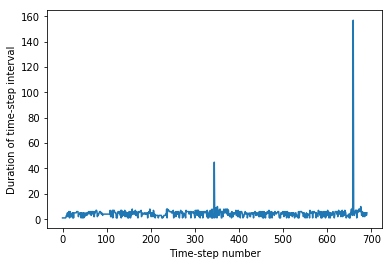

In [55]:
print df['timestamp'][1] - df['timestamp'][0]  # We want to either change the format of the timestamps, or just use them in this form.
intervals = []

for i in range(df.shape[0] - 1):
    intervals.append(df['timestamp'][i+1] - df['timestamp'][i])

interval_arr = np.array([i.total_seconds() for i in intervals])  # Convert these to seconds as floating points
plt.plot(interval_arr)
plt.ylabel('Duration of time-step interval')
plt.xlabel('Time-step number')

We see that there are two huge breaks in the time recordings. At least for the second peak, this seems to be placed near where the NaN and "walking" rows where, so this makes sense.

These might not cause too many problems, as long as we used timestamp values instead of index values for plotting against time

Let's look at some stats of the time intervals to get an idea sort of cadence we have (not including the two big peaks)

Median time interval: 5.0


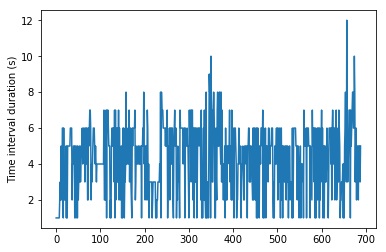

In [56]:
print 'Median time interval:', np.median(interval_arr)
# Clip values above 3 sigma of the median to remove the large outliers
interval_arr_base = interval_arr - np.median(interval_arr)
three_sig = 3 * np.std(interval_arr_base)
interval_arr_sigclip = interval_arr[np.abs(interval_arr_base) < three_sig]
plt.plot(interval_arr_sigclip)
plt.ylabel('Time interval duration (s)')

In [57]:
# Make new column with seconds from start and set as the DataFrame index
df['timestamp_sec'] = (df['timestamp'] - df['timestamp'][0])
df['timestamp_sec'] = [tstamp.total_seconds() for tstamp in df['timestamp_sec']]
df.set_index('timestamp_sec', inplace=True)  # Set the seconds from start as the DataFrame index
df.head(5)

,activity_type,altitude,cadence,distance,fractional_cadence,heart_rate,position_lat,position_long,speed,stance_time,stance_time_balance,stance_time_percent,step_length,timestamp,unknown_61,unknown_66,vertical_oscillation,vertical_ratio
timestamp_sec,,,,,,,,,,,,,,,,,,
0.0,running,169.0,89,0.00,0.5,86,53.649564,-1.803813,2.706,225.0,49.78,33.25,605.0,2018-02-03 08:40:19,3624,47,88.7,14.15
1.0,running,169.0,90,0.00,0.0,87,53.649569,-1.803868,1.847,222.0,49.87,33.00,626.0,2018-02-03 08:40:20,3624,47,87.7,13.93
2.0,running,168.4,90,2.56,0.0,90,53.649545,-1.803891,1.913,224.0,50.09,33.50,961.0,2018-02-03 08:40:21,3621,46,87.7,12.28
3.0,running,168.0,90,2.56,0.0,95,53.649548,-1.803947,1.978,222.0,50.31,33.00,951.0,2018-02-03 08:40:22,3619,46,87.7,10.81
4.0,running,167.8,90,4.91,0.0,95,53.649526,-1.803971,1.997,218.0,50.43,32.75,943.0,2018-02-03 08:40:23,3618,46,87.7,10.25


# Visualisation

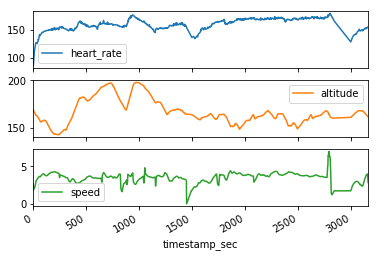

In [58]:
df.plot(kind='line', y=['heart_rate', 'altitude', 'speed'], subplots=True)
plt.show()

In [59]:
# Taken from GPS_car notebook (basically just uses gmap.plot to make html of route plotted on Google maps)
# Made into a function so that a 3rd variable can be used for colour visualisation
def plot_colourline_gmap(x, y, c):
    c = cm.jet((c-c.min()) / (c.max()-c.min()))   # Defines colours as tuples with each val within 0 - 1
    c = [mpl.colors.to_hex(clr) for clr in c]     # gmplot can only accept colours in hexidecimal format
    for i in np.arange(len(x)-1):
        gmap.plot([x[i],x[i+1]], [y[i],y[i+1]], c=c[i], edge_width=5)
    return

In [60]:
# Create gmplot instance with location of map centre and zoom level (1 - 20)
gmap = gmplot.GoogleMapPlotter(np.mean(df['position_lat']), np.mean(df['position_long']), 15)
# Plot altitude as the colour argument
plot_colourline_gmap(df['position_lat'].values, df['position_long'].values, df['altitude'].values)

gmap.draw("Gary_garmin_route_plot.html")

## Heart rate zones

Maximum heart rate ~ 220 - 30 = 190 bpm

Assume resting heart rate ~ 60 bpm

Heart rate reserve (HRR) = max - resting = 190 - 60 = 130 bpm

**Fat-burning** = resting + (0.5 x HRR to 0.75 x HRR)  =  60 + (0.5 x 130 to 0.75 x 130)  =  **125 to 158 bpm**

**Aerobic** = resting + (0.75 x HRR to 0.85 x HRR) = 60 + (0.75 x 130 to 0.85 x HRR) = **158 to 171 bpm**

**Aerobic-Anaerobic** = resting + (0.85 x HRR to 0.90 x HRR) = 60 + (0.85 x 130 to 0.90 x HRR) = **171 to 177 bpm**

**Anaerobic** = resting + (0.90 x HRR) to max = 60 + (0.90 x 130) to max = **177 to 190 bpm**

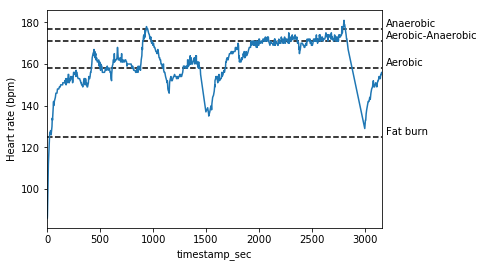

In [61]:
df.plot(kind='line', y='heart_rate', legend=False)
plt.hlines(125, df.index[0], df.index[-1], linestyles='dashed')
plt.hlines(158, df.index[0], df.index[-1], linestyles='dashed')
plt.hlines(171, df.index[0], df.index[-1], linestyles='dashed')
plt.hlines(177, df.index[0], df.index[-1], linestyles='dashed')
plt.ylabel('Heart rate (bpm)')
plt.text(3200, 126, 'Fat burn')
plt.text(3200, 159, 'Aerobic')
plt.text(3200, 172, 'Aerobic-Anaerobic')
plt.text(3200, 178, 'Anaerobic')
plt.show()

Seems like the run covered all zones... Let's look at the percentage of time spent in each:

In [62]:
fat_burn = np.logical_and(df['heart_rate'] >= 125, df['heart_rate'] < 158)
aerobic = np.logical_and(df['heart_rate'] >= 158, df['heart_rate'] < 171)
aerobic_anaerobic = np.logical_and(df['heart_rate'] >= 171, df['heart_rate'] < 177)
anaerobic = df['heart_rate'] >= 177

In [63]:
fat_burn_t = interval_arr[fat_burn[1:]].sum()
aerobic_t = interval_arr[aerobic[1:]].sum()
aerobic_anaerobic_t = interval_arr[aerobic_anaerobic[1:]].sum()
anaerobic_t = interval_arr[anaerobic[1:]].sum()
print '% fat burn = ' + "{0:.1f}".format(100 * fat_burn_t / df.index[-1]) + ' %'
print '% aerobic = ' + "{0:.1f}".format(100 * aerobic_t / df.index[-1]) + ' %'
print '% aerobic-anaerobic = ' + "{0:.1f}".format(100 * aerobic_anaerobic_t / df.index[-1]) + ' %'
print '% anaerobic = ' + "{0:.1f}".format(100 * anaerobic_t / df.index[-1]) + ' %'

% fat burn = 39.3 %
% aerobic = 37.0 %
% aerobic-anaerobic = 21.6 %
% anaerobic = 1.4 %


## Correlations

Here we plot a scatter matrix to see what the relationships between the individual features look like

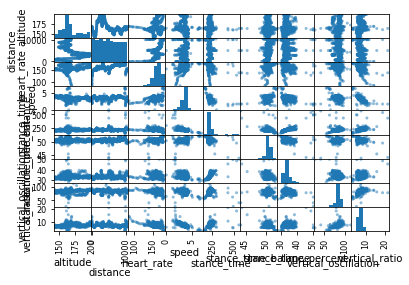

In [64]:
corr_features = ['altitude', 'distance', 'heart_rate', 'speed', 'stance_time', 'stance_time_balance', 'stance_time_percent',
                'timestamp', 'vertical_oscillation', 'vertical_ratio']
scatter_matrix(df[corr_features])
plt.show()

This is not very clear. Can improve the aesthetics of this plot, but even then it looks like there are often too many outliers to see correlations by eye.

Let's try a different visualisation using the correlation values

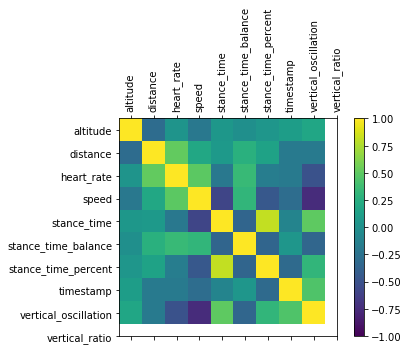

In [65]:
# Correlation
correlations = df[corr_features].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(len(corr_features))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_features, rotation=90)
ax.set_yticklabels(corr_features)
plt.show()

Thinking about it, altitude is probably not that useful, it's probably the change in altitude that is more likely to be correlated with other variables. Let's have a look:

As part of this we need to convert the longitude and latitudes to physical distance

In [66]:
r_Ee = 6378.137e3  # Equatorial radius of Earth (m)
r_Ep = 6356.752e3  # Polar radius of Earth (m)
def lat_deg2m(latitude):
    return latitude * (2*r_Ep*np.pi) / 360.

def lon_deg2m(longitude, latitude):
    d_lat = 2 * r_Ee * np.sin((np.pi / 180.) * 2 * (90. - latitude) / 2)  # diameter of circular slice at lat_deg latitude
    return longitude * (d_lat * np.pi) / 360.

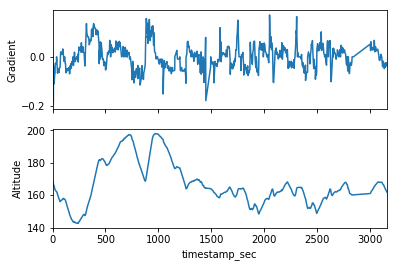

In [67]:
altitude_gradient = []
for i in range(df.shape[0] - 1): 
    delta_lat = lat_deg2m(np.abs(df['position_lat'].iloc[i+1] - df['position_lat'].iloc[i]))
    delta_long = lon_deg2m(np.abs(df['position_long'].iloc[i+1] - df['position_long'].iloc[i]), df['position_lat'].iloc[i])
    delta_distance = np.sqrt(delta_lat ** 2 + delta_long ** 2)
    if delta_distance == 0.:
        grad = np.nan
    else:
        grad = (df['altitude'].iloc[i+1] - df['altitude'].iloc[i]) / delta_distance
    altitude_gradient.append(grad)
    
altitude_gradient = np.array(altitude_gradient)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df.index[1:], altitude_gradient)
ax[0].set_ylabel('Gradient')
df.plot(y='altitude', ax=ax[1], legend=False)
ax[1].set_ylabel('Altitude')
plt.show()

The gradient looks quite noisy, so will try to smooth it a bit:

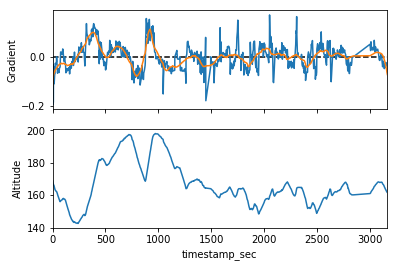

In [68]:
grad_mask = np.isnan(altitude_gradient)
altitude_gradient[grad_mask] = np.nanmedian(altitude_gradient)
altitude_gradient_smooth = savgol_filter(altitude_gradient, window_length=55, polyorder=3)
altitude_gradient_smooth[grad_mask] = np.nan

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df.index[1:], altitude_gradient)
ax[0].plot(df.index[1:], altitude_gradient_smooth)
ax[0].hlines(0, 0, 3500, linestyle='dashed')
ax[0].set_ylabel('Gradient')
df.plot(y='altitude', ax=ax[1], legend=False)
ax[1].set_ylabel('Altitude')
plt.show()

The smoothed gradient is much clearer, and shows that most of the gradient variation was in the first half of the run.

Thus, we ecpect that any correlations with gradient will only really be evident in the first half of the run, where it's variance is largest.

Investigate the correlation with heart rate:

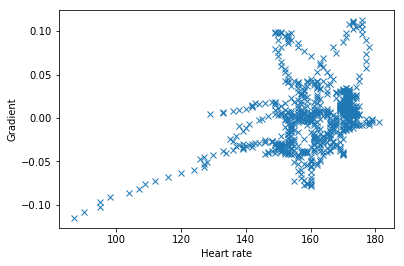

Heart rate vs altitude: [[ 1.          0.03566865]
 [ 0.03566865  1.        ]]
Heart rate vs gradient: [[ 1.          0.24550381]
 [ 0.24550381  1.        ]]
Heart rate vs smoothed gradient: [[  1.  nan]
 [ nan  nan]]
Heart rate vs smoothed gradient, first half of run: [[ 1.          0.49442412]
 [ 0.49442412  1.        ]]


In [69]:
plt.plot(df.loc[1:, 'heart_rate'], altitude_gradient_smooth, 'x')
plt.ylabel('Gradient')
plt.xlabel('Heart rate')
plt.show()
print 'Heart rate vs altitude:', np.corrcoef(df['heart_rate'], df['altitude'])
print 'Heart rate vs gradient:', np.corrcoef(df.loc[1:, 'heart_rate'], altitude_gradient)
print 'Heart rate vs smoothed gradient:', np.corrcoef(df.loc[1:, 'heart_rate'], altitude_gradient_smooth)
half = df.index.size / 2
print 'Heart rate vs smoothed gradient, first half of run:', np.corrcoef(df['heart_rate'].iloc[1:half+1], altitude_gradient_smooth[:half])

As expected, the first half of the run seems to be much more correlated with heart rate. This makes sense as there are much larger changes in altitude here than in the second half. We'll just plot the first half:

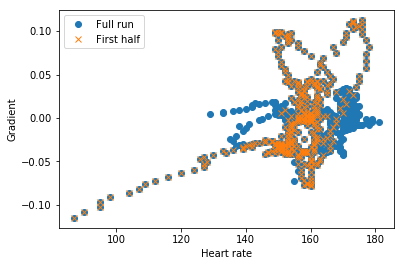

In [70]:
plt.plot(df.loc[1:, 'heart_rate'], altitude_gradient_smooth, 'o', label='Full run')
plt.plot(df['heart_rate'].iloc[1:half+1], altitude_gradient_smooth[:half], 'x', label='First half')
plt.ylabel('Gradient')
plt.xlabel('Heart rate')
plt.legend()
plt.show()

Have to be a bit careful as the initial burn-in of the run (~ 20 - 25 seconds) may be significantly increasing the apparent correlation, but here the heart rate would be rising due to the beginning of the exercise, irrespective of the gradient. Thus, we'll cut this off:

In [71]:
print 'Heart rate vs smoothed gradient, first half of run, with initial burn-in cut off:'
print np.corrcoef(df['heart_rate'].iloc[14:half+1], altitude_gradient_smooth[13:half])

Heart rate vs smoothed gradient, first half of run, with initial burn-in cut off:
[[ 1.          0.38386877]
 [ 0.38386877  1.        ]]


This reduces the correlation a bit, but it still seems like there is a possible relationship between heart rate and gradient. This would be tested with more data, especially steeper gradients.

From the full feature correlation plot earlier it seems like speed could be correlated with stance time (duration of contact with ground) and with vertical oscillation.

There are a few outlier points in both stance time and vertical oscillation so we'll get rid of these first.

In [72]:
base = df['stance_time'] - df['stance_time'].median()
std = base.std()
mask_st = np.abs(base) < (3 * std)

base = df['vertical_oscillation'] - df['vertical_oscillation'].median()
std = base.std()
mask_vo = np.abs(base) < (3 * std)

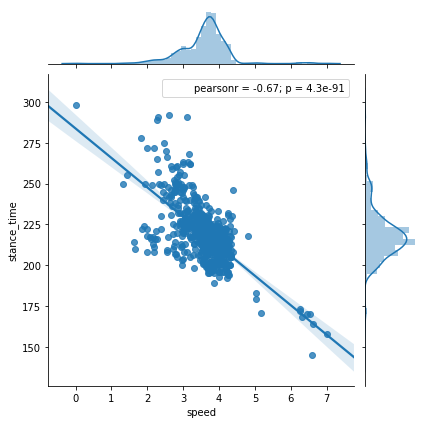

In [73]:
df_stance_speed = df[['speed', 'stance_time']][mask_st]
sns.jointplot(x='speed', y='stance_time', data=df_stance_speed, kind='reg')
plt.show()

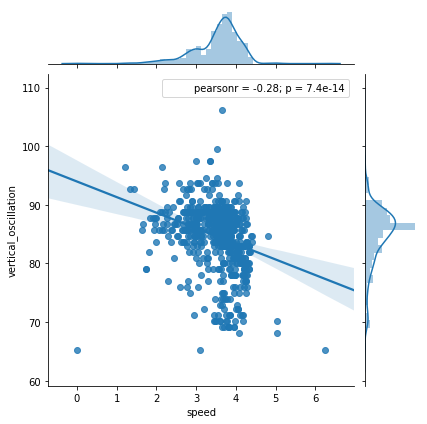

In [74]:
df_vo_speed = df[['speed', 'vertical_oscillation']][mask_vo]
sns.jointplot(x='speed', y='vertical_oscillation', data=df_vo_speed, kind='reg')
plt.show()